# Rekomendasi Pekerjaan (Decision Tree)
Fibonacci - AI Mastery <br>
Tim abc5 <br>
2022 <br>

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
import joblib

# 2. Color Palette

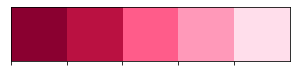

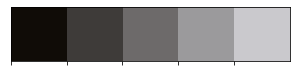

In [2]:
# --- Create List of Color Palletes ---
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(pink_grad)
sns.palplot(black_grad)

# 3. Data Acquisition

In [3]:
#Membaca dataset roo_data.csv
roo_data = pd.read_csv("jobs.csv")
roo_data

,Unnamed: 0,certifications,workshops,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,worked in teams ever?,Suggested Job Role
0,0,information security,testing,poor,programming,testing,BPA,yes,Applications Developer
1,1,shell programming,testing,medium,Management,system developer,Cloud Services,no,Applications Developer
2,2,information security,testing,poor,data engineering,Business process analyst,product development,no,Applications Developer
3,3,r programming,database security,poor,networks,testing,Testing and Maintainance Services,yes,Applications Developer
4,4,distro making,game development,medium,Software Engineering,system developer,BPA,yes,Applications Developer
...,...,...,...,...,...,...,...,...,...
6896,6896,shell programming,hacking,poor,Software Engineering,testing,Testing and Maintainance Services,no,Web Developer
6897,6897,machine learning,hacking,excellent,programming,testing,Testing and Maintainance Services,no,Web Developer
6898,6898,distro making,data science,poor,IOT,system developer,Cloud Services,yes,Web Developer
6899,6899,app development,game development,excellent,data engineering,developer,SAaS services,no,Web Developer


In [4]:
roo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          6901 non-null   int64 
 1   certifications                      6901 non-null   object
 2   workshops                           6901 non-null   object
 3   memory capability score             6901 non-null   object
 4   Interested subjects                 6901 non-null   object
 5   interested career area              6901 non-null   object
 6   Type of company want to settle in?  6901 non-null   object
 7   worked in teams ever?               6901 non-null   object
 8   Suggested Job Role                  6901 non-null   object
dtypes: int64(1), object(8)
memory usage: 485.4+ KB


In [5]:
#Hapus kolom yang tidak berguna
data = roo_data.drop(columns=['Unnamed: 0'])
data

,certifications,workshops,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,worked in teams ever?,Suggested Job Role
0,information security,testing,poor,programming,testing,BPA,yes,Applications Developer
1,shell programming,testing,medium,Management,system developer,Cloud Services,no,Applications Developer
2,information security,testing,poor,data engineering,Business process analyst,product development,no,Applications Developer
3,r programming,database security,poor,networks,testing,Testing and Maintainance Services,yes,Applications Developer
4,distro making,game development,medium,Software Engineering,system developer,BPA,yes,Applications Developer
...,...,...,...,...,...,...,...,...
6896,shell programming,hacking,poor,Software Engineering,testing,Testing and Maintainance Services,no,Web Developer
6897,machine learning,hacking,excellent,programming,testing,Testing and Maintainance Services,no,Web Developer
6898,distro making,data science,poor,IOT,system developer,Cloud Services,yes,Web Developer
6899,app development,game development,excellent,data engineering,developer,SAaS services,no,Web Developer


# 4. Data Pre-processing

In [6]:
#Checking Dimensions
data.shape

(6901, 8)

In [7]:
#Checking Missing Value
data.isnull().sum()

certifications                        0
workshops                             0
memory capability score               0
Interested subjects                   0
interested career area                0
Type of company want to settle in?    0
worked in teams ever?                 0
Suggested Job Role                    0
dtype: int64

In [8]:
#Checking Descriptive Statistic
data.describe()

,certifications,workshops,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,worked in teams ever?,Suggested Job Role
count,6901,6901,6901,6901,6901,6901,6901,6901
unique,9,8,3,10,6,10,2,12
top,r programming,database security,medium,Software Engineering,system developer,Service Based,no,Network Security Engineer
freq,803,897,2317,731,1178,725,3470,630


# 5. Exploratory Data Analysis (EDA)

In [9]:
#Mengetahui jumlah data dalam kolom Suggested Job Role
data['Suggested Job Role'].value_counts()

Network Security Engineer                    630
Software Engineer                            590
UX Designer                                  589
Software Developer                           587
Database Developer                           581
Software Quality Assurance (QA) / Testing    571
Web Developer                                570
CRM Technical Developer                      567
Technical Support                            565
Systems Security Administrator               562
Applications Developer                       551
Mobile Applications Developer                538
Name: Suggested Job Role, dtype: int64

******************************
.: Suggested Job Role :.
******************************


Network Security Engineer                    630
Software Engineer                            590
UX Designer                                  589
Software Developer                           587
Database Developer                           581
Software Quality Assurance (QA) / Testing    571
Web Developer                                570
CRM Technical Developer                      567
Technical Support                            565
Systems Security Administrator               562
Applications Developer                       551
Mobile Applications Developer                538
Name: Suggested Job Role, dtype: int64

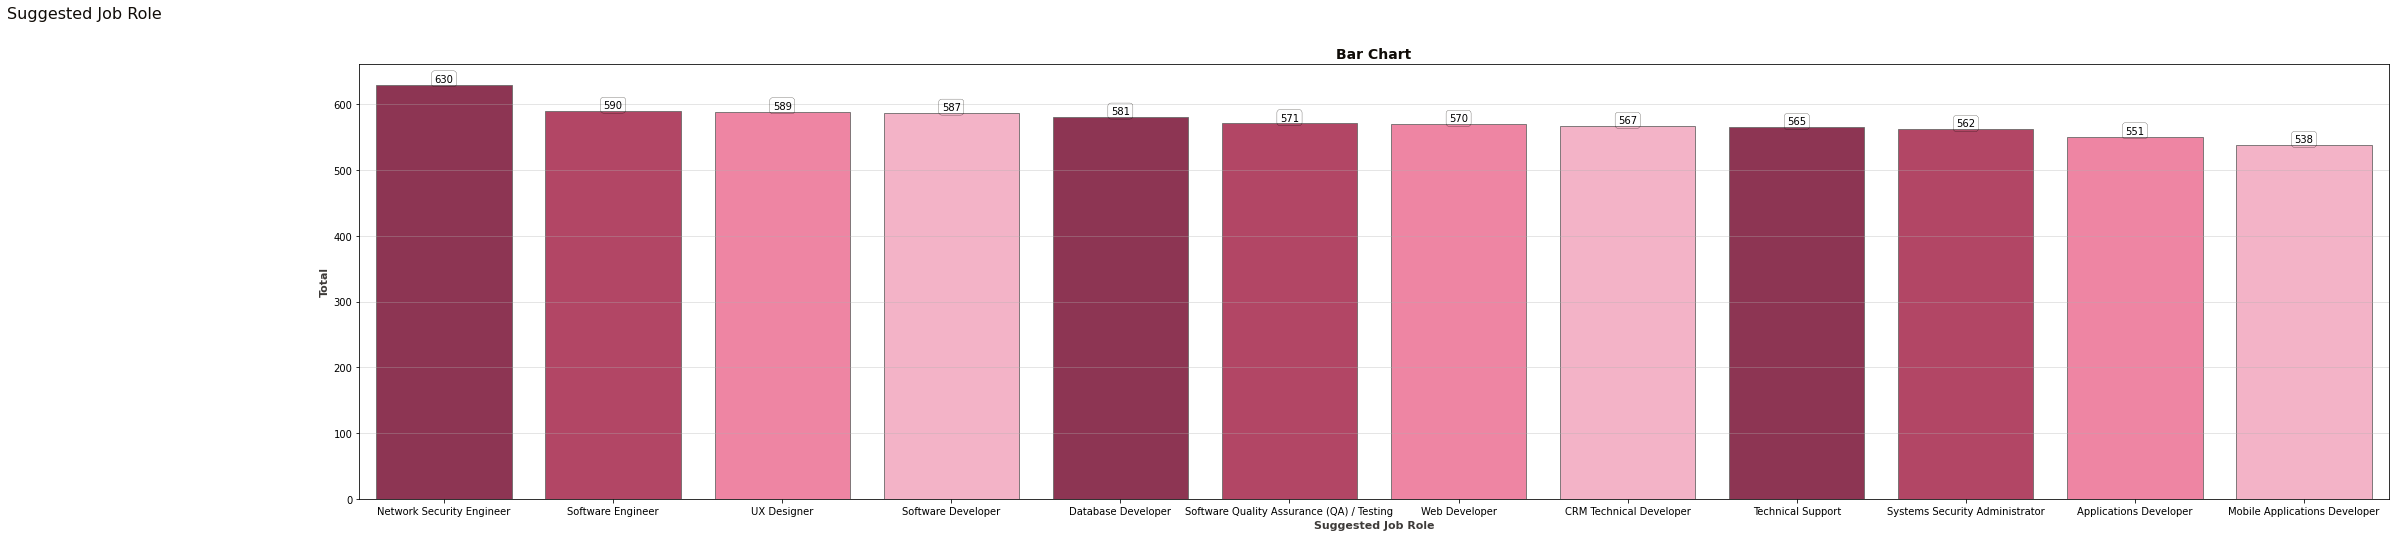

In [10]:
#Visualization Suggested Job Role
colors=pink_grad[0:4]
labels=['Network Security Engineer', 'Software Engineer', 'UX Designer', 'Software Developer', 'Database Developer', 'Software Quality Assurance (QA) / Testing', 'Web Developer',
        'CRM Technical Developer', 'Technical Support', 'Systems Security Administrator', 'Applications Developer', 'Mobile Applications Developer']
order=data['Suggested Job Role'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(80, 8))
plt.suptitle('Suggested Job Role', fontweight='normal', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Box Plot ---
countplt = plt.subplot(1, 2, 2)
plt.title('Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='Suggested Job Role', data=data, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Suggested Job Role', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Suggested Job Role :.'+'\033[0m')
print('*' * 30)
data['Suggested Job Role'].value_counts(dropna=False)

# 6. Feature Engineering

In [11]:
print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'worked in teams ever?', 'Suggested Job Role']


## Numbering Encoding for Categorical

In [12]:
#Mengelompokkan variabel dataset yang berupa kategori
data_cat = data[['certifications','workshops','memory capability score','Interested subjects','interested career area ','Type of company want to settle in?','worked in teams ever?']]
for i in data_cat:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes

data.head()

,certifications,workshops,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,worked in teams ever?,Suggested Job Role
0,4,6,2,9,5,0,1,Applications Developer
1,8,6,1,2,4,1,0,Applications Developer
2,4,6,2,5,0,9,0,Applications Developer
3,7,2,2,7,5,7,1,Applications Developer
4,1,3,1,3,4,0,1,Applications Developer


# 7. Modelling

## Split Data

In [13]:
X = data.drop('Suggested Job Role',axis=1)
y = data['Suggested Job Role']

In [14]:
X.head()

,certifications,workshops,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,worked in teams ever?
0,4,6,2,9,5,0,1
1,8,6,1,2,4,1,0
2,4,6,2,5,0,9,0
3,7,2,2,7,5,7,1
4,1,3,1,3,4,0,1


In [15]:
y.head()

0    Applications Developer
1    Applications Developer
2    Applications Developer
3    Applications Developer
4    Applications Developer
Name: Suggested Job Role, dtype: object

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((5175, 7), (1726, 7))

In [17]:
model = DecisionTreeClassifier(random_state=1)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [18]:
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test)

# 8. Evaluation

In [19]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test * 100,2)} %")

Akurasi Model (Train) : 99.07 %
Akurasi Model (Test)  : 7.71 %


In [20]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=\n",cm)

confusion matrics=
 [[10  6 14 13 15  7 17 18 10 14 16 11]
 [10  4 13 12 10 14  5  7 11 11 17  6]
 [15 12  9 14 13  7 15 12  9  9 13  7]
 [15 11 12  5 10 17 10 14 15 20  8 10]
 [20 12 15 11  9 14 12  8 10 16 21 12]
 [10 12 17  8 15 19 11 16 10  8  8 11]
 [19 14 15  6 22 13  9 11 12 12 18 14]
 [11 13 14 12 18 11  7 11  9 10 10 11]
 [ 5 11 12 11 19 12 11 10 14 14 11  8]
 [11 10 13  7 10  9 14 13 12 10 10 15]
 [15 10 11  9 13 10  9 15 18  9 18 14]
 [12 17  9 14 19  8 13 12  7  9  8 15]]


## Save Model

In [21]:
joblib.dump((model), "model_job_dt.model")

['model_job_dt.model']

# 9. Predicting Class

In [22]:
userdata = [['5','2','0','3','2','4','1']]
ynewclass = model.predict(userdata)
ynew = model.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Software Quality Assurance (QA) / Testing']
Probabilities of all classes:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
